In [1]:
from plane_packing import Plane, pack_plane
from packing_orders import random_order, back_to_front, front_to_back, windows_first, alley_first

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from ipywidgets import FloatProgress
from IPython.display import display

In [3]:
Ns = {'rnd':[],'b2f':[],'f2b':[],'wd1':[],'al1':[]}
N = 300
rows, seats = 12, 3

f = FloatProgress(min=0, max=100, description = 'Packing:')
display(f)
for j in range(N):
    Ns['rnd'].append(random_order(rows,seats))
    Ns['b2f'].append(back_to_front(rows,seats))
    Ns['f2b'].append(front_to_back(rows,seats))
    Ns['wd1'].append(windows_first(rows,seats))
    Ns['al1'].append(alley_first(rows,seats))
    if not j%(N/100): f.value+=1

A Jupyter Widget

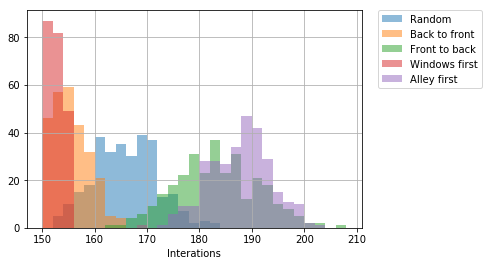

In [36]:
v = range(150,210,2)
plt.hist(Ns['rnd'], v, alpha=0.5, label = 'Random')
plt.hist(Ns['b2f'], v, alpha=0.5, label = 'Back to front')
plt.hist(Ns['f2b'], v, alpha=0.5, label = 'Front to back')
plt.hist(Ns['wd1'], v, alpha=0.5, label = 'Windows first')
plt.hist(Ns['al1'], v, alpha=0.5, label = 'Alley first')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Interations')
plt.show()